In [ ]:
# CLASSIFICATION:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris=load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

Text(0, 0.5, 'sepal width')

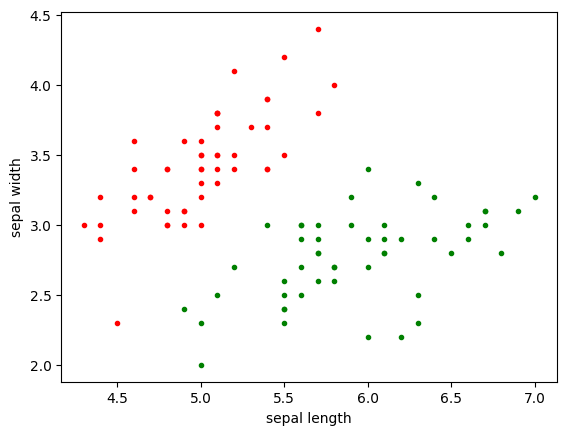

In [ ]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='red', marker='.')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='green', marker='.')

plt.xlabel('sepal length')
plt.ylabel('sepal width')


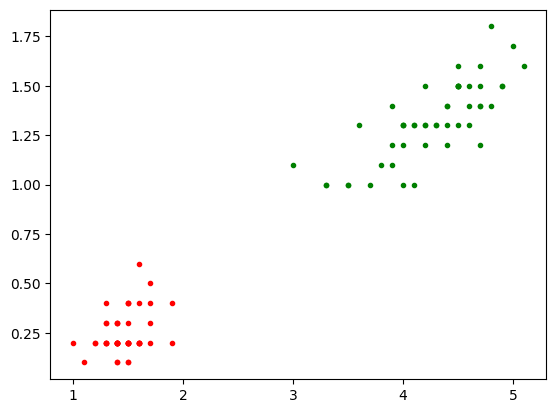

In [ ]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='red', marker='.')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='green', marker='.')



In [ ]:
x=df.drop('target', axis=1)
y=df['target']

xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.25, random_state=2)
model=KNeighborsClassifier(n_neighbors=10)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.9473684210526315

Text(50.722222222222214, 0.5, 'predicted value')

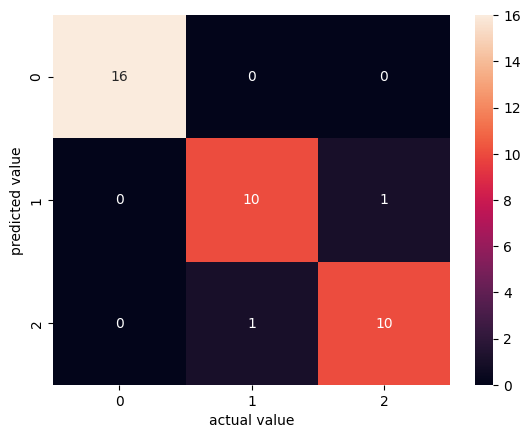

In [ ]:
ypred=model.predict(xtest)
cm=confusion_matrix(ytest,ypred)

sns.heatmap(cm, annot=True)
plt.xlabel('actual value')
plt.ylabel('predicted value')

In [ ]:
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



<!-- #REGRESSION: -->

In [ ]:
#REGRESSION:

<!-- #REGRESSION: -->

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/diamonds.csv')

In [ ]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
data=data.drop('Unnamed: 0',axis=1)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


null value checking-

In [ ]:
data.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


checking types of data in the dataset-

In [ ]:
data.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

changing the data into integers-

In [ ]:

cutdict={'Fair':1,'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
colordict={'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}
claritydict={'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}


In [ ]:
data['cut']=data['cut'].map(cutdict)
data['color']=data['color'].map(colordict)
data['clarity']=data['clarity'].map(claritydict)

In [ ]:
data.dtypes

,0
carat,float64
cut,int64
color,int64
clarity,int64
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
x=data.drop('price', axis=1)
y=data['price']

xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.25, random_state=3)

model=KNeighborsRegressor()
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.969125443944725

In [ ]:
model.score(xtest,ytest)

0.954259838529978

In [ ]:
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [ ]:
model1=KNeighborsRegressor()
model1.fit(xtrain,ytrain)
model1.score(xtest,ytest)

0.966422175037011